In [1]:
import os
import sys
sys.path.insert(0,'D:\Documents\OneDrive\Documents\Data Science\MaxKelsen\csenergy-internship')
from src.helpers.slicingdata import formatting
from src.helpers.slicingdata import week
from src.helpers.slicingdata1 import rearrange
from src.helpers.frequency import relfreq
import pandas as pd
import torch
import numpy as np
from src.modelling.Gaussian_Process2 import splitdata2,GPenergy2
from src.modelling.basic_sparse_GP1 import inducing_point_gamma
from src.modelling.basic_sparse_GP1 import Gaussiansparse, Gaussiansparse1

from src.modelling.testing import testing
from src.helpers.splitdata3 import splitdata3


In [5]:
import numpy as np
import pyro
import pyro.contrib.gp as gp
import math
DIR_BASE='D:/Documents/OneDrive/Documents/Data Science/MaxKelsen/csenergy-internship/data/raw'
FILE_HISTORY1=os.path.join(DIR_BASE,"CapPrice.csv")
df_1=pd.read_csv(FILE_HISTORY1)
df_1=df_1.iloc[range(0,10000),:]
#m=df_.iloc[:,0].str[3:6]
#x=np.empty([len(df_),5],dtype=object)
#x[:,0]=df_.iloc[:,1]
#x[m=='01',1]=1
#x[m=='02',1]=2
#x[m=='03',1]=3
#x[m=='04',1]=4
#x[m=='05',1]=5
#x[m=='06',1]=6
#x[m=='07',1]=7
#x[m=='08',1]=8
#x[m=='09',1]=9
#x[m=='10',1]=10
#x[m=='11',1]=11
#x[m=='12',1]=12
#df_1=df_1.iloc[range(0,50000),:]
x1,x2,Y1,Y2,t1,t2=splitdata3(df_1,'min')

testing(x1,x2,Y1,Y2,10,df_1)

TypeError: testing() missing 3 required positional arguments: 'Xu', 'notestpoints', and 'df_'

In [1]:
import numpy as np
import pyro
import pyro.contrib.gp as gp
import math

DIR_BASE='D:/Documents/OneDrive/Documents/Data Science/MaxKelsen/csenergy-internship/data/raw'
FILE_HISTORY1=os.path.join(DIR_BASE,"Demand.csv")
df_1=pd.read_csv(FILE_HISTORY1)
#df_1=df_1.iloc[range(0,50000),:]
x2,data1=splitdata2(df_1,'01', 'Workdays')
#print(data1)
data2=data1.iloc[range(0,math.floor(0.8*len(data1))),0]
x=x2[range(0,math.floor(0.8*len(data1)))]
x1=x2[range(math.floor(0.8*len(data1)),len(data1))]
x=x.astype(float)
x1=x1.astype(float)
data2=data2.astype(float)
#validationdata=validationdata.astype(float)
print(type(x1))
validationdata=data1.iloc[range(math.floor(0.8*len(data1)),len(data1)),0]
validationdata=validationdata.astype(float)
kernel=gp.kernels.Periodic(input_dim=1,variance=torch.tensor(10000.))
#kernel1= gp.kernels.Sum(gp.kernels.Periodic(input_dim=1),gp.kernels.Periodic(input_dim=1))
#kernel=gp.kernels.Sum(kernel1,gp.kernels.Periodic(input_dim=1))
#print(x1)
#print(x1)
#print(data2)
#print(validationdata)
lower,upper,m,cov,p,Rsq=GPenergy2(x,x1,data2,validationdata,kernel)



NameError: name 'pd' is not defined

<class 'numpy.ndarray'>
0
1
2
Periodic()


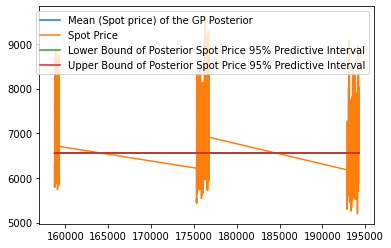

D:\Documents\OneDrive\Documents\Data Science\MaxKelsen\csenergy-internship\src\modelling\Gaussian_Process2.py:100: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  xj=torch.tensor(list(x))


0
1
2
Periodic()


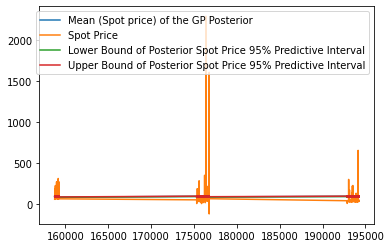

In [2]:
import numpy as np
import pyro
import pyro.contrib.gp as gp
import math

DIR_BASE='D:/Documents/OneDrive/Documents/Data Science/MaxKelsen/csenergy-internship/data/raw'
FILE_HISTORY1=os.path.join(DIR_BASE,"Demand.csv")
df_1=pd.read_csv(FILE_HISTORY1)
#df_1=df_1.iloc[range(0,50000),:]
x2,data1=splitdata2(df_1,'01', 'Workdays')
#print(data1)
data2=data1.iloc[range(0,math.floor(0.8*len(data1))),0]
x=x2[range(0,math.floor(0.8*len(data1)))]
x1=x2[range(math.floor(0.8*len(data1)),len(data1))]
#x=np.concatenate(x,data1.iloc[range(0,math.floor(0.8*len(data1))),1])
#x1=np.concatenate(x1,data1.iloc[range(math.floor(0.8*len(data1)),len(data1)),1])
x=x.astype(float)
x1=x1.astype(float)
data2=data2.astype(float)
#validationdata=validationdata.astype(float)
print(type(x1))
validationdata=data1.iloc[range(math.floor(0.8*len(data1)),len(data1)),0]
validationdata=validationdata.astype(float)
#kernel=gp.kernels.RBF(input_dim=1,variance=torch.tensor(10000.),lengthscale=torch.tensor(100.))
kernel=gp.kernels.Periodic(input_dim=1,variance=torch.tensor(10000.))
#kernel1= gp.kernels.Sum(gp.kernels.Periodic(input_dim=1),gp.kernels.Periodic(input_dim=1))
#kernel=gp.kernels.Sum(kernel1,gp.kernels.Periodic(input_dim=1))
#print(x1)
#print(x1)
#print(data2)
#print(validationdata)
lower,upper,m1,m,cov,p,Rsq=GPenergy2(x,x1,data2,validationdata,kernel,meanf=lambda x: 7000)
x=np.transpose(np.vstack((x,m1.detach().numpy())))
x1=np.transpose(np.vstack((x1,m.detach().numpy())))
data3=data1.iloc[range(0,math.floor(0.8*len(data1))),1]
validationdata1=data1.iloc[range(math.floor(0.8*len(data1)),len(data1)),1]
kernel=gp.kernels.Periodic(input_dim=1,variance=torch.tensor(20.),lengthscale=torch.tensor(1.))
lower1,upper1,m2,m3,cov1,p1,Rsq1=GPenergy2(x,x1,data3,validationdata1,kernel,meanf=lambda x: 0.2)

In [2]:

import numpy as np
import pyro
import pyro.contrib.gp as gp
import math

DIR_BASE='D:/Documents/OneDrive/Documents/Data Science/MaxKelsen/csenergy-internship/data/raw'
FILE_HISTORY1=os.path.join(DIR_BASE,"CapPrice.csv")
df_1=pd.read_csv(FILE_HISTORY1)
df_1=df_1.iloc[range(0,10000),:]
#m=df_.iloc[:,0].str[3:6]
#x=np.empty([len(df_),5],dtype=object)
#x[:,0]=df_.iloc[:,1]
#x[m=='01',1]=1
#x[m=='02',1]=2
#x[m=='03',1]=3
#x[m=='04',1]=4
#x[m=='05',1]=5
#x[m=='06',1]=6
#x[m=='07',1]=7
#x[m=='08',1]=8
#x[m=='09',1]=9
#x[m=='10',1]=10
#x[m=='11',1]=11
#x[m=='12',1]=12
#df_1=df_1.iloc[range(0,50000),:]
x1,x2,Y1,Y2,t1,t2=splitdata3(df_1,'min',scaler1,scaler)
Xu=inducing_point_gamma(n=len(x1), alpha=14., beta=float(1.5625*len(x1)),shift=len(x1)/22., num_inducing=100, x1=x1)
post_mean,post_cov,R2=Gaussiansparse(x1,x2,Y1,Y2,t1,t2,Xu,scaler,scaler1) 
#print(f'20{df_1.iloc[i,0][7:9]}')
#print(int(df_1.iloc[i,0][0:2]))
# print(df_1.iloc[i,0])

TypeError: Gaussiansparse() missing 2 required positional arguments: 'scaler' and 'scaler1'

In [2]:
import numpy as np
import pyro
import pyro.contrib.gp as gp
import math

DIR_BASE='D:/Documents/OneDrive/Documents/Data Science/MaxKelsen/csenergy-internship/data/raw'
FILE_HISTORY1=os.path.join(DIR_BASE,"Demand.csv")
df_1=pd.read_csv(FILE_HISTORY1)
#print('01'==df_1.iloc[:,1].str[3:5])
print((df_1.iloc[:,2]).dtypes)

float64


In [10]:
print(len(df_1))
print(len(df_))

205968
205968


In [9]:
import numpy as np
import pyro
import pyro.contrib.gp as gp
import math
DIR_BASE = 'D:/documents'
FILE_HISTORY = os.path.join(DIR_BASE, "CapPrice.csv")
df_=pd.read_csv(FILE_HISTORY)
#df_=df_.iloc[range(0,45000),:]
xg,data=splitdata1(df_,'Jan', 'Workdays')
data1=data.iloc[range(0,math.floor(0.8*len(data)))]
x=xg[range(0,math.floor(0.8*len(data)))]
x1=xg[range(math.floor(0.8*len(data)),len(data))]
validationdata=data.iloc[range(math.floor(0.8*len(data)),len(data))]
#kernel = gp.kernels.RBF(input_dim=1, variance=torch.tensor(5.),
                        #lengthscale=torch.tensor(10.))
kernel= gp.kernels.Polynomial(input_dim=1)
#kernel=gp.kernels.Sum(gp.kernels.Periodic(input_dim=1,period=torch.tensor(48.)),gp.kernels.RBF(input_dim=1))
#,gp.kernels.Periodic(input_dim=1,period=torch.tensor(240.)))
#gp.kernels.Periodic(input_dim=1,period=torch.tensor(1440.)))
#kernel=gp.kernels.Sum(kernel1,gp.kernels.Periodic(input_dim=1,period=torch.tensor(240.)))
#kernel = gp.kernels.Periodic(input_dim=1,period=torch.tensor(48.))
                       # lengthscale=torch.tensor(10.))
#print('hello')
lower,upper,m,cov,p,Rsq=GPenergy1(x,x1,data1,validationdata,kernel)
D=np.floor(len(validationdata)/48)
D1 = np.empty(D, dtype=object)#plt.plot(model=gpr, plot_observed_data=True, plot_predictions=True)
R=len(validationdata)%48
for i in range(0,D):
     C=np.empty(48,dtype=object)
     sum=0
     for j in range(0,48):
        C[j]=p_value[j]
        sum=sum+p_value[j]
     C=C/sum
     D1[R+i*D]=C

#x=[]
#for i in range(1,len(df_)+1):
        
       # x.append(i)
#x=torch.tensor([x]) 
#torch.Tensor(x)
#torch.from_numpy(x)


NameError: name 'splitdata1' is not defined

In [4]:
print(len(x))

10176


In [5]:
print(Rsq1)

-0.06677792018402484


In [8]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_1.iloc[:,2],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Test Statistic                -1.476173e+01
p-value                        2.396476e-27
#lags used                     5.700000e+01
number of observations used    4.994200e+04
critical value (1%)           -3.430481e+00
critical value (5%)           -2.861598e+00
critical value (10%)          -2.566801e+00
dtype: float64


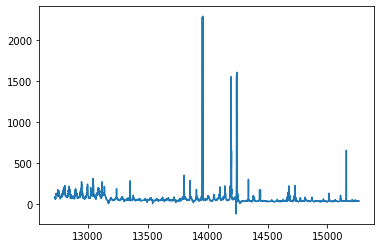

In [11]:
x=np.empty(len(data),dtype=object)
x1=np.empty(len(validationdata),dtype=object)
for i in range(1,len(data)+1):
  x[i-1]=i
for j in range(len(data)+1,len(data)+1+len(validationdata)):
  x1[j-len(data)-1]=j
import matplotlib.pyplot as plt
plt.plot(x1,validationdata,label='Spot Price')

In [6]:
print(m.detach().numpy())

[71.454254 79.01361  84.63393  ... 76.73581  53.680492 42.770275]


In [6]:
import numpy as np
DIR_BASE = 'D:/documents'
FILE_HISTORY = os.path.join(DIR_BASE, "CapPrice.csv")
df_=pd.read_csv(FILE_HISTORY)
df_=df_.iloc[range(0,15000),:]
s=np.empty(len(df_),dtype=object)
s[df_.iloc[:,3]>0]=1
s[df_.iloc[:,3]==0]=0
#df_=df_.iloc[range(0,15000),:]
#m=df_.iloc[:,0].str[3:6]
#arr = np.empty(len(df_), dtype=object)
#arr[m=='Jan']=1
#arr[m=='Feb']=2
#arr[m=='Mar']=3
#arr[m=='Apr']=4
#arr[m=='May']=5
#arr[m=='Jun']=6
#arr[m=='Jul']=7
#arr[m=='Aug']=8
#arr[m=='Sep']=9
#arr[m=='Oct']=10
#arr[m=='Nov']=11
#arr[m=='Dec']=12
#x=week(1,df_,arr)
#data2,E,s=formatting(df_,'Jan',2010)
#2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
#,rearrange(10,df_)
x,x1=relfreq(df_,'Workdays',2010,('Jan'))
#x,x1=relfreq(df_,'Non Workdays',(2010),('May','Jun','Jul','Aug','Sep','Oct'))
#print(E==0)


96
96
48


In [14]:
!pip install pmdarima

distutils: c:\users\william\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\william\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\william\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\william\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\william\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
echo 1 > /proc/sys/vm/overcommit_memory

The system cannot find the path specified.


In [6]:
import pmdarima as pm
#import sklearn
arima = pm.auto_arima(data2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=48)

y=arima.predict(start=(len(data2)+1),end=(len(data2)+len(validationdata)))
Rsq=sklearn.metrics.r2_score(validationdata,y)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[48] intercept   : AIC=inf, Time=39.91 sec
 ARIMA(0,1,0)(0,0,0)[48] intercept   : AIC=130100.825, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[48] intercept   : AIC=inf, Time=30.71 sec
 ARIMA(0,1,1)(0,0,1)[48] intercept   : AIC=122530.084, Time=24.12 sec
 ARIMA(0,1,0)(0,0,0)[48]             : AIC=130098.832, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[48] intercept   : AIC=124902.943, Time=0.56 sec
 ARIMA(0,1,1)(1,0,1)[48] intercept   : AIC=inf, Time=25.35 sec
 ARIMA(0,1,1)(0,0,2)[48] intercept   : AIC=inf, Time=202.20 sec
 ARIMA(0,1,1)(1,0,0)[48] intercept   : AIC=120649.768, Time=28.71 sec
 ARIMA(0,1,1)(2,0,0)[48] intercept   : AIC=120253.106, Time=175.04 sec
 ARIMA(0,1,1)(2,0,1)[48] intercept   : AIC=inf, Time=188.60 sec


MemoryError: Unable to allocate 730. MiB for an array with shape (97, 97, 10176) and data type float64

In [30]:
y1=arima.predict(n_periods=len(validationdata))
Rsq=sklearn.metrics.r2_score(validationdata,y1)
print(Rsq)

-0.20364237959030218


In [20]:
import sklearn
y=arima.predict(start=(len(data1)+1),end=(len(data1)+len(validationdata)))
print(len(data1)+1)
print((len(data1)+len(validationdata)))
print(y)
#Rsq=sklearn.metrics.r2_score(validationdata,y)

10177
12720
[108.58570973 109.01918357 109.23776998 109.57061627 109.62099913
 109.80821059 109.80861073 109.91506028 109.89988861 109.96249865]


In [33]:
import pmdarima as pm
#import sklearn
arima = pm.auto_arima(data1, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=240)

y=arima.predict(n_periods=len(validationdata))
Rsq=sklearn.metrics.r2_score(validationdata,y)

Performing stepwise search to minimize aic


MemoryError: Unable to allocate 4.51 GiB for an array with shape (244, 244, 10176) and data type float64

1707


In [13]:
x=()
for i in range(2010,2020):
    x[i]=i

SyntaxError: cannot assign to function call (Temp/ipykernel_1528/2342898500.py, line 2)

In [8]:

from src.modelling.simple_dirichlet_model_adrian_rajkamal import posterior_mean
y=posterior_mean(x1)


In [9]:
print(x)
print(y)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.1111111111111111 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1111111111111111
 0.1111111111111111 0.1111111111111111 0.2222222222222222
 0.2222222222222222 0.1111111111111111 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.03508771929824561, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.017543859649122806, 0.03508771929824561, 0.03508771929824561, 0.03508771929824561, 0.05263157894736842, 0.05263157894736842, 0.03508771929824561,

[0.03508771929824561, 0.03508771929824561, 0.03508771929824561, 0.03508771929824561, 0.05263157894736842, 0.05263157894736842, 0.03508771929824561]


Text(0, 0.5, 'Exceedance Event Posterior Probability Expectation')

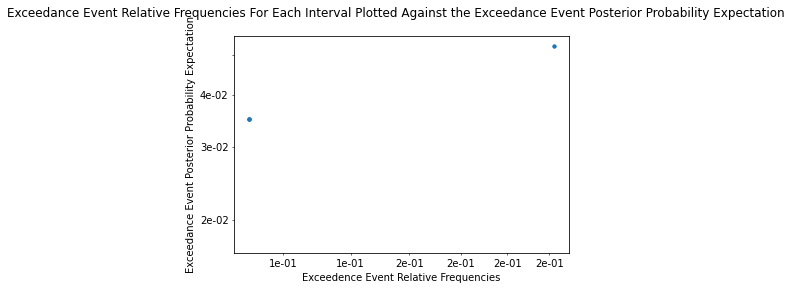

In [10]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import LogFormatter
z=[y[i] for i in range(0,len(x)) if x[i]!=0]
print(z)
fig = plt.figure()
ax=plt.subplot(111)
#fig,ax=plt.subplots()
ax.loglog(x,y,'.')
formatter = LogFormatter(labelOnlyBase=False, minor_thresholds=(2, 0.4))
ax.xaxis.set_minor_formatter(formatter)
ax.yaxis.set_minor_formatter(formatter)
#FrmatStrFormatter("%.2f")
fig.suptitle('Exceedance Event Relative Frequencies For Each Interval Plotted Against the Exceedance Event Posterior Probability Expectation')
plt.xlabel('Exceedence Event Relative Frequencies')
plt.ylabel('Exceedance Event Posterior Probability Expectation')
#plt.tick_params(axis='y', which='minor')
#plt.tick_params(axis='x', which='minor')
#subsx=[0.5, 1.0, 1.5]
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xticks([10^(-2)])
#ax.set_yticks([10^(-2)])



In [11]:
x=np.array([3,4,6])
x[[0,1,2]]=[2,1,2]
print(x)

[2 1 2]


In [10]:
#%%
import os
import sys
sys.path.insert(0,'D:\Documents\OneDrive\Documents\Data Science\MaxKelsen\csenergy-internship')
from src.helpers.slicingdata import formatting
from src.helpers.slicingdata import week
from src.helpers.slicingdata1 import rearrange
from src.helpers.frequency import relfreq
import pandas as pd
#%%

#%%

#%%
import numpy as np
DIR_BASE = 'D:/documents'
FILE_HISTORY = os.path.join(DIR_BASE, "CapPrice.csv")
df_=pd.read_csv(FILE_HISTORY)

s=np.empty(len(df_),dtype=object)
s[df_.iloc[:,3]>0]=1
s[df_.iloc[:,3]==0]=0
#df_=df_.iloc[range(0,15000),:]
#m=df_.iloc[:,0].str[3:6]
#arr = np.empty(len(df_), dtype=object)
#arr[m=='Jan']=1
#arr[m=='Feb']=2
#arr[m=='Mar']=3
#arr[m=='Apr']=4
#arr[m=='May']=5
#arr[m=='Jun']=6
#arr[m=='Jul']=7
#arr[m=='Aug']=8
#arr[m=='Sep']=9
#arr[m=='Oct']=10
#arr[m=='Nov']=11
#arr[m=='Dec']=12
#x=week(1,df_,arr)
#data2,E,s=formatting(df_,'Jan',2010)
#2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
#,rearrange(10,df_)
rel_freqs_train,freqs_train=relfreq(df_,'Workdays',(2010,2011,2012,2013,2014,2015,2016),('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
rel_freqs_test,freqs_test=relfreq(df_,'Workdays',(2017,2018,2019,2020),
            ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
#x,x1=relfreq(df_,'Non Workdays',(2010),('May','Jun','Jul','Aug','Sep','Oct'))
#print(E==0)

#%% md


#%%
#print((freqs_test))
#%%

#%%

from src.modelling.simple_dirichlet_model_adrian_rajkamal import posterior_mean
means=posterior_mean(freqs_train)

#%%
print(rel_freqs_test)

8064
8064
4032
4608
4608
2304
[0.0 0.005917159763313609 0.0 0.005917159763313609 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.04142011834319527 0.005917159763313609 0.01775147928994083
 0.011834319526627219 0.023668639053254437 0.005917159763313609
 0.005917159763313609 0.0 0.023668639053254437 0.005917159763313609
 0.029585798816568046 0.011834319526627219 0.011834319526627219
 0.04142011834319527 0.01775147928994083 0.011834319526627219
 0.01775147928994083 0.04142011834319527 0.047337278106508875
 0.08284023668639054 0.11834319526627218 0.08284023668639054
 0.0650887573964497 0.07100591715976332 0.08875739644970414
 0.023668639053254437 0.005917159763313609 0.01775147928994083
 0.011834319526627219 0.0 0.0 0.011834319526627219 0.01775147928994083
 0.01775147928994083 0.0]


[0.003424657534246575, 0.003424657534246575, 0.0017123287671232876, 0.003424657534246575, 0.0017123287671232876, 0.0017123287671232876, 0.0017123287671232876, 0.0017123287671232876, 0.0017123287671232876, 0.0017123287671232876, 0.003424657534246575, 0.0017123287671232876, 0.015410958904109588, 0.059931506849315065, 0.010273972602739725, 0.015410958904109588, 0.011986301369863013, 0.02226027397260274, 0.018835616438356163, 0.018835616438356163, 0.00684931506849315, 0.017123287671232876, 0.010273972602739725, 0.025684931506849314, 0.018835616438356163, 0.025684931506849314, 0.023972602739726026, 0.03595890410958904, 0.039383561643835614, 0.04452054794520548, 0.05821917808219178, 0.0547945205479452, 0.0821917808219178, 0.07705479452054795, 0.04965753424657534, 0.03767123287671233, 0.032534246575342464, 0.04794520547945205, 0.030821917808219176, 0.017123287671232876, 0.011986301369863013, 0.003424657534246575, 0.00684931506849315, 0.0017123287671232876, 0.010273972602739725, 0.018835616438

Text(0, 0.5, 'Exceedance Event Posterior Probability Expectation')

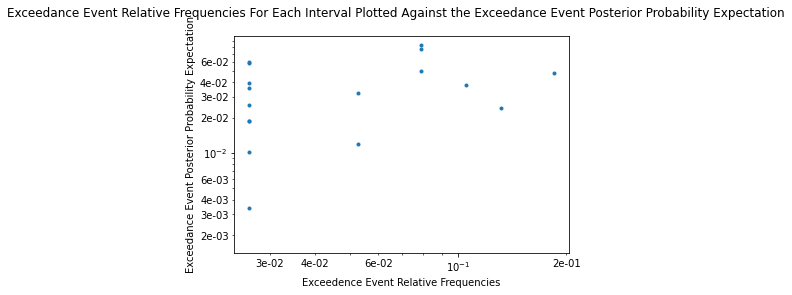

In [10]:
print(means)
#%%
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import LogFormatter
z=[means[i] for i in range(0,len(rel_freqs_test)) if rel_freqs_test[i]!=0]
print(z)
fig = plt.figure()
ax=plt.subplot(111)
#fig,ax=plt.subplots()
ax.loglog(rel_freqs_test,means, '.')
formatter = LogFormatter(labelOnlyBase=False, minor_thresholds=(2, 0.4))
ax.xaxis.set_minor_formatter(formatter)
ax.yaxis.set_minor_formatter(formatter)
#FrmatStrFormatter("%.2f")
fig.suptitle('Exceedance Event Relative Frequencies For Each Interval Plotted Against the Exceedance Event Posterior Probability Expectation')
plt.xlabel('Exceedence Event Relative Frequencies')
plt.ylabel('Exceedance Event Posterior Probability Expectation')

In [4]:
import csv
import numpy as np
import pandas as pd
import datetime
from multiprocessing import Pool
from multiprocessing import sharedctypes
import os
import sys
import torch


from itertools import repeat

import itertools

sys.path.insert(0,'D:\Documents\OneDrive\Documents\Data Science\MaxKelsen\csenergy-internship')
from src.helpers.slicingdata import formatting
from src.helpers.slicingdata import week
from src.helpers.slicingdata1 import rearrange
from src.helpers.frequency import relfreq
import matplotlib.pyplot as plt
import torch

import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist

#DIR_BASE = 'D:/documents'
#FILE_HISTORY = os.path.join(DIR_BASE, "CapPrice.csv")
#df_=pd.read_csv(FILE_HISTORY)
def GPenergy(df_,kernel,mean,month,work):
    #s=np.empty(len(df_),dtype=object)
 
 m=df_.iloc[:,0].str[3:6]
 arr = np.empty(len(df_), dtype=object)
 arr[m=='Jan']=1
 arr[m=='Feb']=2
 arr[m=='Mar']=3
 arr[m=='Apr']=4
 arr[m=='May']=5
 arr[m=='Jun']=6
 arr[m=='Jul']=7
 arr[m=='Aug']=8
 arr[m=='Sep']=9
 arr[m=='Oct']=10
 arr[m=='Nov']=11
 arr[m=='Dec']=12
 b,c=df_,arr
 

 c2=np.zeros(len(df_))
 if type(month)==str:
    
   f=(month==df_.iloc[:,0].str[3:6])
   f=np.array(f)
   f=f.astype(int)
   c2=c2+f
 else:
  for r in range(0,len(month)):
     
     f=(month[r]==df_.iloc[:,0].str[3:6])
     
     f=np.array(f)
     f=f.astype(int)
     c2=c2+f
 
 c2=(c2==1)
 M2=[i for i, x in enumerate(c3) if x]
 arguments=[(a,b,c) for a in M2]
 E=np.zeros(len(df_))
 E1=np.array(P.starmap(week,arguments))
 E[M2]=E1
 
 if work=='Workdays':
  data=df_.iloc[(E==1),2]
 if work='Non Workdays':
  data=df_.iloc[(E==0),2]

SyntaxError: invalid syntax (Temp/ipykernel_18344/202292923.py, line 76)